#IMPORT PACKAGE AND LOAD DATA




In [1]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt


#CLEAN AND PROCESS DATA



In [2]:
my_df = pd.read_csv('sales2019.csv')
my_df.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,1/29/2019 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,1/26/2019 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,1/5/2019 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,1/1/2019 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150.00,1/22/2019 21:20,"657 Johnson St, San Francisco, CA 94016"


In [3]:
my_df = my_df.dropna(how = 'all')
my_df = my_df[my_df['Product'] != 'Product']
my_df.drop_duplicates(inplace = True)

In [4]:
set(my_df['Product'])
my_df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
185681,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
185682,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
185683,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
185684,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


**Convert the 2 column types "Quantity Ordered" and "Price Each"**

In [5]:
my_df['Quantity Ordered'] = pd.to_numeric(my_df['Quantity Ordered'],downcast= 'integer')
my_df['Price Each'] = pd.to_numeric(my_df['Price Each'], downcast='float')

**Calculate the value of each order**

In [6]:
my_df['Sale'] = my_df['Price Each'] * my_df['Quantity Ordered']
my_sale = my_df.pop('Sale')
my_df.insert(4,'Sales',my_sale)


In [7]:
my_prd = my_df.groupby('Product').sum()['Sales'].sort_values(ascending= False)

#WHICH PRODUCT IS BEST SELLER?


In [8]:
prd = []
sl = []
for x,y in my_prd.items():
    prd.append(x)
    sl.append(y)
print(prd)
print(sl)
print

['Macbook Pro Laptop', 'iPhone', 'ThinkPad Laptop', 'Google Phone', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Apple Airpods Headphones', 'Flatscreen TV', 'Bose SoundSport Headphones', '27in FHD Monitor', 'Vareebadd Phone', '20in Monitor', 'LG Washing Machine', 'LG Dryer', 'Lightning Charging Cable', 'USB-C Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)']
[8032500.0, 4792900.0, 4127958.75, 3317400.0, 2433147.5, 2352898.0, 2345550.0, 1443900.0, 1342865.625, 1131074.625, 827200.0, 453818.71875, 399600.0, 387600.0, 346376.53125, 285975.4375, 246082.75, 106041.59375, 92648.140625]


<function print>

**Revenue chart by product**

In [9]:
my_prd

Product
Macbook Pro Laptop            8.032500e+06
iPhone                        4.792900e+06
ThinkPad Laptop               4.127959e+06
Google Phone                  3.317400e+06
27in 4K Gaming Monitor        2.433148e+06
34in Ultrawide Monitor        2.352898e+06
Apple Airpods Headphones      2.345550e+06
Flatscreen TV                 1.443900e+06
Bose SoundSport Headphones    1.342866e+06
27in FHD Monitor              1.131075e+06
Vareebadd Phone               8.272000e+05
20in Monitor                  4.538187e+05
LG Washing Machine            3.996000e+05
LG Dryer                      3.876000e+05
Lightning Charging Cable      3.463765e+05
USB-C Charging Cable          2.859754e+05
Wired Headphones              2.460828e+05
AA Batteries (4-pack)         1.060416e+05
AAA Batteries (4-pack)        9.264814e+04
Name: Sales, dtype: float32

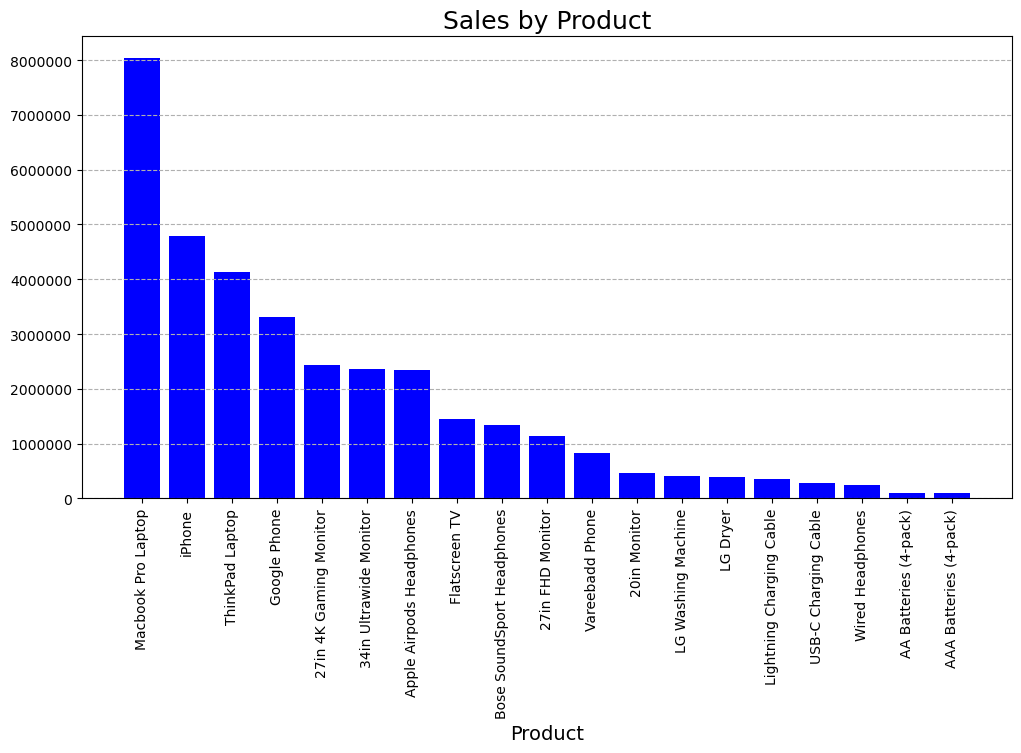

In [10]:
plt.bar(x=prd, height=sl, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Product', size=14)
plt.grid(axis='y', linestyle='--')
plt.gcf().set_size_inches(12, 6)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales by Product', size=18)
    
plt.show()

#NUMBER OF SALE PER PRODUCT

**Sales quantity of each product?**


In [11]:
my_qtt = my_df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending= False,)
my_qtt
    

Product
AAA Batteries (4-pack)        30986.0
AA Batteries (4-pack)         27615.0
USB-C Charging Cable          23931.0
Lightning Charging Cable      23169.0
Wired Headphones              20524.0
Apple Airpods Headphones      15637.0
Bose SoundSport Headphones    13430.0
27in FHD Monitor               7541.0
iPhone                         6847.0
27in 4K Gaming Monitor         6239.0
34in Ultrawide Monitor         6192.0
Google Phone                   5529.0
Flatscreen TV                  4813.0
Macbook Pro Laptop             4725.0
ThinkPad Laptop                4128.0
20in Monitor                   4126.0
Vareebadd Phone                2068.0
LG Washing Machine              666.0
LG Dryer                        646.0
Name: Quantity Ordered, dtype: float64

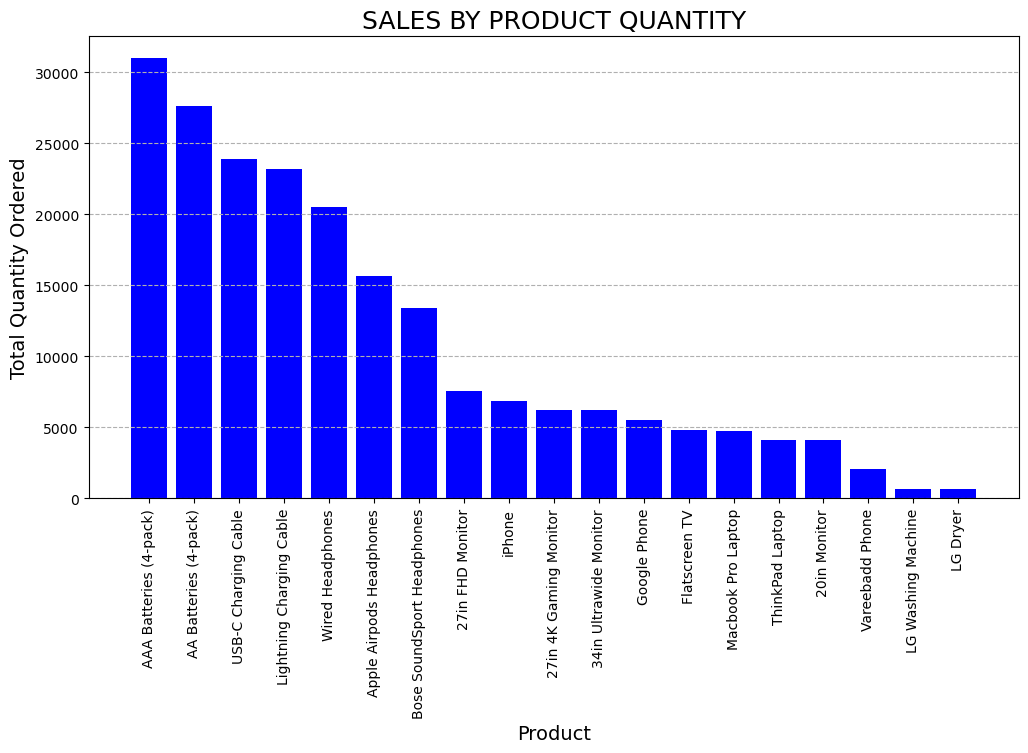

In [12]:
prd = []
qtt = []
for x,y in my_qtt.items():
    prd.append(x)
    qtt.append(y)
plt.bar(x=prd, height=qtt, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Product', size=14)
plt.ylabel('Total Quantity Ordered', size=14)
plt.grid(axis='y', linestyle='--')
plt.gcf().set_size_inches(12, 6)
plt.title('SALES BY PRODUCT QUANTITY', size=18)
plt.show()

#REVENUE OF EACH CITY

**Add the "city" column to the chart**

In [13]:
def split_city(x):
    x= str(x)
    city = x.split(',')
    return city[1]
my_df['City'] = my_df['Purchase Address'].apply(lambda x:split_city(x))


In [14]:
rvn_city = my_df.groupby('City').sum()['Sales'].sort_values()
city = []
revenue_ct = []
for x,y in rvn_city.items():
    city.append(x)
    revenue_ct.append(y)
print(city)
print(revenue_ct)


[' Austin', ' Portland', ' Seattle', ' Dallas', ' Atlanta', ' Boston', ' New York City', ' Los Angeles', ' San Francisco']
[1818044.375, 2319332.0, 2745046.0, 2765374.0, 2794199.0, 3658627.75, 4661867.0, 5448304.5, 8254743.5]


**Print out revenue of each city**


In [15]:
rvn_city

City
 Austin           1818044.375
 Portland         2319332.000
 Seattle          2745046.000
 Dallas           2765374.000
 Atlanta          2794199.000
 Boston           3658627.750
 New York City    4661867.000
 Los Angeles      5448304.500
 San Francisco    8254743.500
Name: Sales, dtype: float32

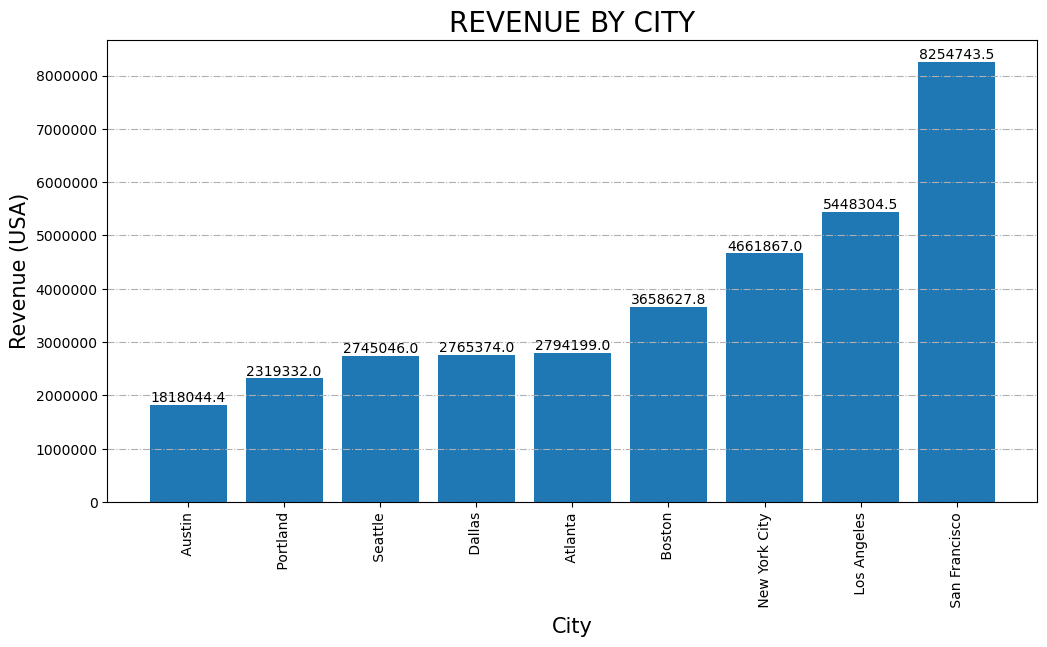

In [16]:
plt.bar(x = city, height = rvn_city, )
plt.xticks(rotation= 90)
fit = plt.gcf().set_size_inches(12,6)
for i in range(len(city)):
    plt.annotate((rvn_city[i]), xy=(city[i], (rvn_city[i])), ha='center', va='bottom')
plt.title('REVENUE BY CITY',size = 20)
plt.ylabel('Revenue (USA)',size= 15)
plt.xlabel('City',size= 15)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis = 'y',linestyle = '-.')
plt.show()

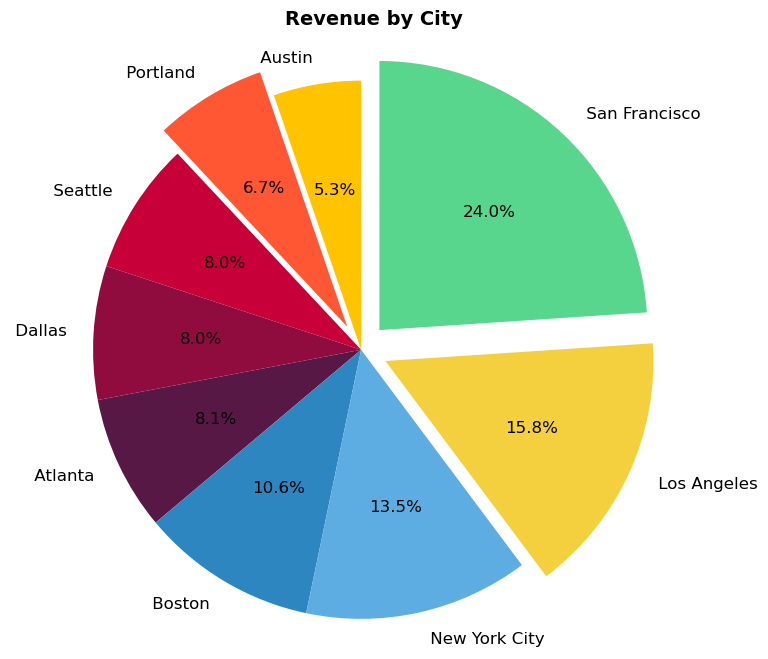

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
explode = (0, 0.1, 0, 0, 0, 0, 0, 0.1, 0.1)
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', '#2E86C1', '#5DADE2', '#F4D03F', '#58D68D']
ax.pie(revenue_ct, labels=city, autopct='%1.1f%%', explode=explode, colors=colors, startangle=90, textprops={'fontsize': 12})
ax.axis('equal')
ax.set_title('Revenue by City', fontsize=14, fontweight='bold')
plt.show()

#HOURLY REVENUE

In [18]:
def split_hour(x):
   x = str(x)
   row_time = x.split('/')[-1]
   row_time = row_time.split(' ')[-1]
   h = row_time.split(':')[0]
   if len(h)==1:
      return  '0' + h  
   return h
my_df['Hour'] = my_df['Order Date'].apply(lambda x: split_hour(x))

In [19]:
revenue_hour = my_df.groupby('Hour').sum()['Sales'].sort_index()
rv_hour = []
hour = []
for x,y in revenue_hour.items():
    hour.append(x)
    rv_hour.append(round(y,1))

In [20]:
revenue_hour

Hour
00    7.135487e+05
01    4.605639e+05
02    2.348395e+05
03    1.457429e+05
04    1.625461e+05
05    2.306649e+05
06    4.479630e+05
07    7.440673e+05
08    1.192309e+06
09    1.638784e+06
10    1.942988e+06
11    2.296620e+06
12    2.314360e+06
13    2.152370e+06
14    2.082514e+06
15    1.940623e+06
16    1.902523e+06
17    2.126554e+06
18    2.218374e+06
19    2.411971e+06
20    2.280784e+06
21    2.040790e+06
22    1.606244e+06
23    1.177793e+06
Name: Sales, dtype: float32

C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_4088\3341408868.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(hour,rv_hour, 'go-',color = 'red')


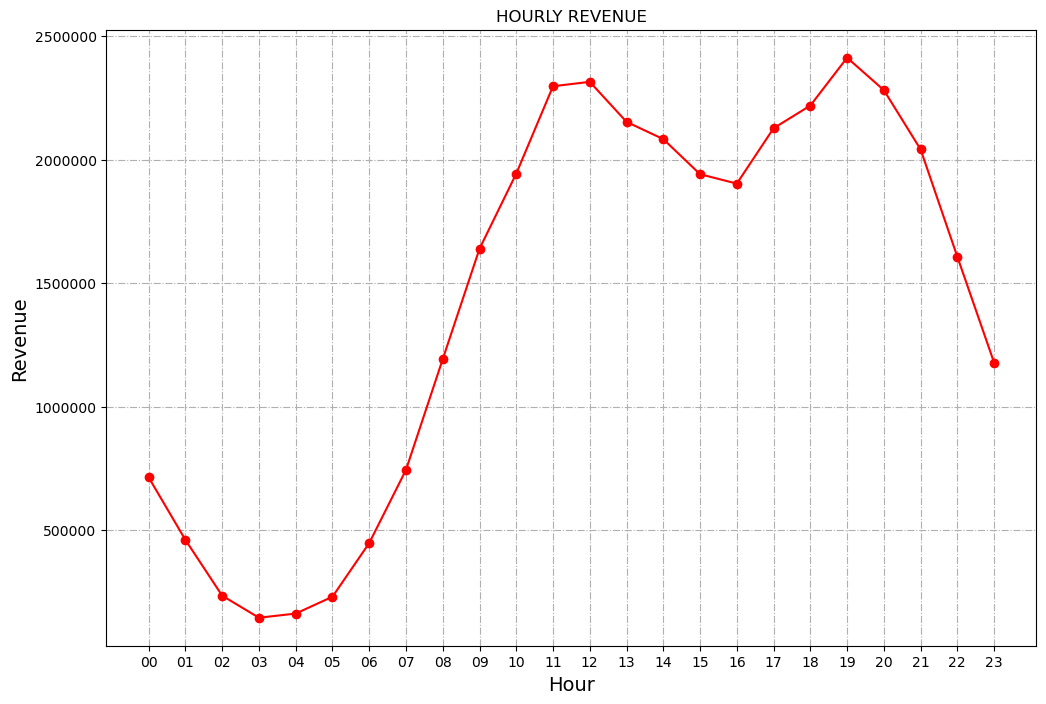

In [21]:
plt.plot(hour,rv_hour, 'go-',color = 'red')
plt.gcf().set_size_inches(12, 8)
plt.grid(linestyle = '-.')
plt.title('HOURLY REVENUE')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Hour',size = 14)
plt.ylabel('Revenue',rotation=90,size = 14)
plt.show()

#MONTHLY REVENUE

In [22]:
def split_hour(x):
   x=str(x)
   row_month = x.split('/')[0]
   if len(row_month)==1:
      return '0'+ row_month
   return row_month
my_df['Month'] = my_df['Order Date'].apply(lambda x: split_hour(x))
revenue_month = my_df.groupby('Month').sum()['Sales']

In [23]:
month = []
rv_month = []
for x,y in revenue_month.items():
    month.append(x)
    rv_month.append(y)
revenue_month

Month
01    1821413.125
02    2200078.000
03    2804973.250
04    3389218.000
05    3150616.250
06    2576280.250
07    2646461.250
08    2241083.250
09    2094465.625
10    3734777.750
11    3197875.000
12    4608295.500
Name: Sales, dtype: float32

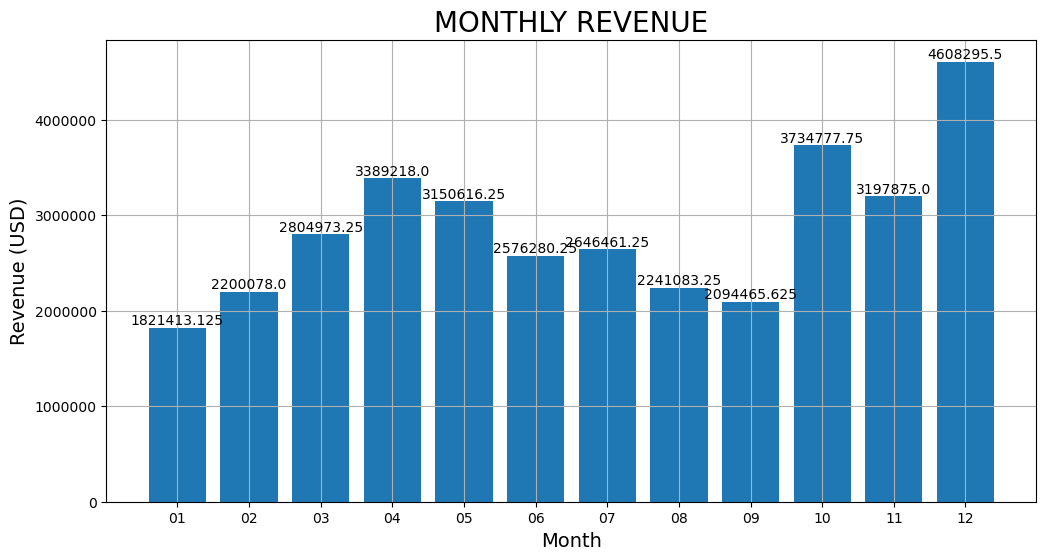

In [24]:
plt.bar(height=rv_month, x = month)
plt.grid()
plt.title("MONTHLY REVENUE",size = 20)
plt.xlabel("Month",size = 14)
plt.ylabel("Revenue (USD)",size = 14)
plt.xticks(month)
for i in range(len(rv_month)):
    plt.annotate(str(rv_month[i]),xy=(month[i],rv_month[i]),ha='center', va='bottom')
plt.ticklabel_format(style='plain', axis='y')
plt.gcf().set_size_inches(12, 6)
plt.show()